## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

In [ ]:
# Poin 1 & 2: Penjelasan (Ditampilkan sebagai Teks)
print("--- Penjelasan Tugas ---")
print("1. Kasus yang diambil: Deteksi Spam SMS.")
print("   Tujuannya adalah mengklasifikasikan pesan SMS sebagai 'Spam' (1) or 'Ham' (0).")
print("2. Penjelasan Kolom (Setelah Pembersihan Awal):")
print("   - 'label': Target (0 untuk Ham, 1 untuk Spam).")
print("   - 'text': Fitur (isi pesan SMS).")
print("--------------------------------------------------\n")


# Poin 3: Import Library
print("Meng-import library...")
# Data Handling
import pandas as pd
import numpy as np
import re

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# NLP (NLTK)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer # Sesuai template (Lemmatization)

# Scikit-learn (ML)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB # Untuk perbandingan

# Deep Learning (TensorFlow Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # Diperlukan untuk Lemmatizer
print("Library NLTK siap.")


# Poin 4: Load Data
print("\nMemuat data 'spam_sms.csv'...")
# Ganti 'spam_sms.csv' jika nama file Anda berbeda
df = pd.read_csv('spam_sms.csv', encoding='latin-1')

# Pembersihan Awal (Sesuai panduan sebelumnya)
if 'Unnamed: 2' in df.columns:
    df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print("Data berhasil dimuat dan dibersihkan (nama kolom & label).")
print("\n5 baris pertama data:")
print(df.head())

--- Penjelasan Tugas ---
1. Kasus yang diambil: Deteksi Spam SMS.
   Tujuannya adalah mengklasifikasikan pesan SMS sebagai 'Spam' (1) or 'Ham' (0).
2. Penjelasan Kolom (Setelah Pembersihan Awal):
   - 'label': Target (0 untuk Ham, 1 untuk Spam).
   - 'text': Fitur (isi pesan SMS).
--------------------------------------------------

Meng-import library...
Library NLTK siap.

Memuat data 'spam_sms.csv'...
Data berhasil dimuat dan dibersihkan (nama kolom & label).

5 baris pertama data:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

--- Info Dasar & Data Kosong ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB

Jumlah data kosong per kolom:
label    0
text     0
dtype: int64

Jumlah data duplikat: 403
Data duplikat telah dihapus. Jumlah data sekarang: 5169

Panjang rata-rata pesan: 79.19 karakter

Distribusi Label (Ham vs Spam):


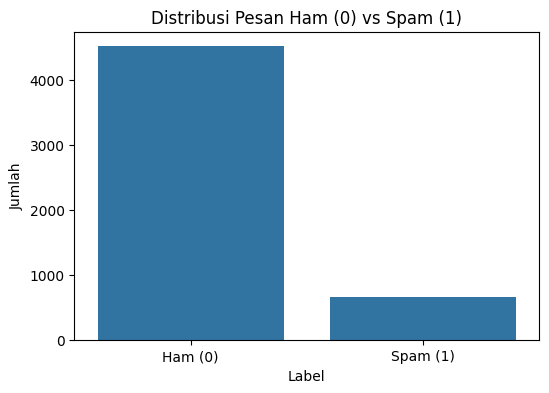

In [ ]:
# Poin 1 & 4: Jumlah Baris & Cek Data Kosong
print("Info Dasar & Data Kosong")
df.info()

print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())
# Catatan: Jika ada data kosong di 'text' atau 'label', kita harus menghapusnya.
df.dropna(inplace=True)


# Poin 3: Cek Data Duplikasi
duplicate_count = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicate_count}")

# Hapus data duplikat
df = df.drop_duplicates(keep='first')
print(f"Data duplikat telah dihapus. Jumlah data sekarang: {len(df)}")


# Poin 2: Panjang Rata-rata Setiap Baris
df['text_length'] = df['text'].apply(len)
print(f"\nPanjang rata-rata pesan: {df['text_length'].mean():.2f} karakter")


# Poin 5: Distribusi Data (Bar Chart)
print("\nDistribusi Label (Ham vs Spam):")
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribusi Pesan Ham (0) vs Spam (1)')
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
# catatan (lakukan tahap 1- 5 apabila diperlukan, jika tidak langsung ke bagian 6-9)

In [ ]:
# Poin 1-5: Preprocessing (Tokenisasi, Lemmatization, Stopword, Normalisasi)
# Saya gabungkan semua tahap ini ke dalam satu fungsi

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Poin 5: Text Normalisasi (Lowercase) & Hapus Tanda Baca/Angka
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    
    # Poin 1: Tokenisasi
    tokens = word_tokenize(text)
    
    cleaned_tokens = []
    for word in tokens:
        # Poin 4: Stopword Removal
        if word not in stop_words:
            # Poin 2: Lemmatization (Sesuai template)
            # (Poin 3: Stemming, tidak kita pakai karena sudah pakai Lemmatization)
            cleaned_tokens.append(lemmatizer.lemmatize(word))
            
    return " ".join(cleaned_tokens)

print("Memulai proses preprocessing teks (mungkin butuh beberapa detik)...")
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("Preprocessing selesai.")
print(df[['text', 'cleaned_text']].head())


# Poin 6: Matrix Correlation (Opsional)
print("\n# Poin 6 (Matrix Correlation) diabaikan karena opsional dan kurang relevan untuk data teks mentah.")


# Poin 7: Labeling Data
print("\n# Poin 7 (Labeling Data) tidak diperlukan.")
print("  Alasan: Dataset ini sudah memiliki label ('label': 0 atau 1).")


# Poin 8: Text Vektorisasi (TF-IDF)
print("\nMemulai Text Vektorisasi (TF-IDF)...")
tfidf = TfidfVectorizer(max_features=5000) # Kita ambil 5000 fitur kata terpenting

X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

print(f"Bentuk (Shape) matriks fitur X (TF-IDF): {X.shape}")


# Poin 9: Data Splitting (skala 0.8, 0.2)
print("\nMelakukan split data (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih (train): {X_train.shape[0]}")
print(f"Jumlah data uji (test): {X_test.shape[0]}")

# Ubah data sparse TF-IDF menjadi array padat (dense) untuk Deep Learning
# Model ML biasa (Naive Bayes) bisa menangani data sparse
# Model Deep Learning (Keras) butuh data dense
print("\nMengubah data sparse ke dense (untuk Deep Learning)...")
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
print("Data siap untuk modeling.")

Memulai proses preprocessing teks (mungkin butuh beberapa detik)...
Preprocessing selesai.
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  

# Poin 6 (Matrix Correlation) diabaikan karena opsional dan kurang relevan untuk data teks mentah.

# Poin 7 (Labeling Data) tidak diperlukan.
  Alasan: Dataset ini sudah memiliki label ('label': 0 atau 1).

Memulai Text Vektorisasi (TF-IDF)

## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih (baik machine learning maupun deep learning)
# Disarankan menggunakan deep learning.

In [ ]:
# Penjelasan Model (Sesuai Template)
print("--- Penjelasan Model ---")
print("Sesuai saran template, kita akan menggunakan Deep Learning (Neural Network).")
print("Model ini terdiri dari beberapa lapisan (layers):")
print("1. Input Layer: Sesuai jumlah fitur TF-IDF (5000).")
print("2. Hidden Layer: Lapisan tersembunyi (16 neuron) dengan aktivasi 'relu' untuk mempelajari pola.")
print("3. Dropout Layer: Untuk mencegah overfitting.")
print("4. Output Layer: 1 neuron dengan aktivasi 'sigmoid', karena ini adalah klasifikasi biner (0 atau 1).")
print("\nKita juga akan melatih model Naive Bayes sebagai pembanding.")


# Model 1: Machine Learning (Naive Bayes) - Untuk Perbandingan
print("\nMelatih model Naive Bayes...")
model_nb = MultinomialNB()
# Naive Bayes bisa pakai data sparse (X_train), lebih cepat
model_nb.fit(X_train, y_train) 
print("Model Naive Bayes (model_nb) selesai dilatih.")


# Model 2: Deep Learning (Sesuai Saran Template)
print("\nMembangun model Deep Learning (Neural Network)...")
# Tentukan jumlah fitur input
input_dim = X_train_dense.shape[1] 

model_dl = Sequential()
model_dl.add(Dense(16, input_dim=input_dim, activation='relu'))
model_dl.add(Dropout(0.5)) # Mencegah overfitting
model_dl.add(Dense(1, activation='sigmoid')) # Output layer untuk biner

# Compile model
model_dl.compile(optimizer='adam',
                 loss='binary_crossentropy', # Loss untuk klasifikasi biner
                 metrics=['accuracy'])

print("Model Deep Learning (model_dl) berhasil dibangun.")
model_dl.summary() # Tampilkan arsitektur model

# Melatih model Deep Learning
print("\nMelatih model Deep Learning (model_dl)...")
# Kita gunakan data dense (X_train_dense)
history = model_dl.fit(X_train_dense, y_train,
                       epochs=10, # Jumlah iterasi latihan
                       batch_size=32,
                       validation_split=0.1, # Pakai 10% data latih untuk validasi
                       verbose=1)

print("Model Deep Learning (model_dl) selesai dilatih.")

--- Penjelasan Model ---
Sesuai saran template, kita akan menggunakan Deep Learning (Neural Network).
Model ini terdiri dari beberapa lapisan (layers):
1. Input Layer: Sesuai jumlah fitur TF-IDF (5000).
2. Hidden Layer: Lapisan tersembunyi (16 neuron) dengan aktivasi 'relu' untuk mempelajari pola.
3. Dropout Layer: Untuk mencegah overfitting.
4. Output Layer: 1 neuron dengan aktivasi 'sigmoid', karena ini adalah klasifikasi biner (0 atau 1).

Kita juga akan melatih model Naive Bayes sebagai pembanding.

Melatih model Naive Bayes...
Model Naive Bayes (model_nb) selesai dilatih.

Membangun model Deep Learning (Neural Network)...


d:\Dockuments\anaconda\envs\spam_detection\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Deep Learning (model_dl) berhasil dibangun.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        80,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,033 (312.63 KB)

 Trainable params: 80,033 (312.63 KB)

 Non-trainable params: 0 (0.00 B)


Melatih model Deep Learning (model_dl)...
Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8406 - loss: 0.6075 - val_accuracy: 0.9155 - val_loss: 0.4922
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8882 - loss: 0.4205 - val_accuracy: 0.9203 - val_loss: 0.3088
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9360 - loss: 0.2818 - val_accuracy: 0.9638 - val_loss: 0.2008
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9605 - loss: 0.2015 - val_accuracy: 0.9758 - val_loss: 0.1414
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9718 - loss: 0.1495 - val_accuracy: 0.9807 - val_loss: 0.1077
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9753 - loss: 0.1295 - val_accuracy: 0.9831 - val_loss: 0.0884
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9798 - loss: 0.1010 - val_accuracy: 0.9831 - val_loss: 0.0756
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accurac

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

 Evaluasi Model Deep Learning (model_dl) 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

1. Confusion Matrix (Deep Learning):
[[883   6]
 [ 19 126]]


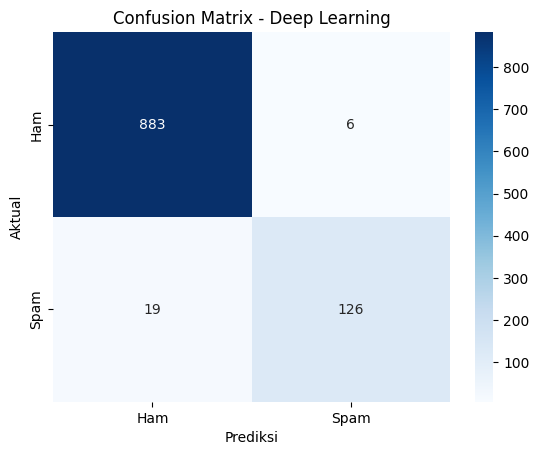


2. Classification Report (Deep Learning):
              precision    recall  f1-score   support

     Ham (0)       0.98      0.99      0.99       889
    Spam (1)       0.95      0.87      0.91       145

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


--- Evaluasi Model Naive Bayes (model_nb) [Sebagai Pembanding] ---

1. Confusion Matrix (Naive Bayes):
[[886   3]
 [ 30 115]]

2. Classification Report (Naive Bayes):
              precision    recall  f1-score   support

     Ham (0)       0.97      1.00      0.98       889
    Spam (1)       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [9]:
print(" Evaluasi Model Deep Learning (model_dl) ")

# Lakukan prediksi (hasilnya probabilitas 0-1)
y_pred_proba_dl = model_dl.predict(X_test_dense)
# Ubah probabilitas menjadi kelas (0 atau 1) dengan batas 0.5
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int).flatten()

# 1. Confusion Matrix (Deep Learning)
print("\n1. Confusion Matrix (Deep Learning):")
cm_dl = confusion_matrix(y_test, y_pred_dl)
print(cm_dl)
# Visualisasi
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Deep Learning')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 2. Laporan Klasifikasi (Deep Learning)
print("\n2. Classification Report (Deep Learning):")
print(classification_report(y_test, y_pred_dl, target_names=['Ham (0)', 'Spam (1)']))


# Evaluasi Model Naive Bayes (model_nb)
print("\n--- Evaluasi Model Naive Bayes (model_nb) [Sebagai Pembanding] ---")

# Lakukan prediksi (langsung kelas 0 atau 1)
y_pred_nb = model_nb.predict(X_test) # Pakai data sparse X_test

# 1. Confusion Matrix (Naive Bayes)
print("\n1. Confusion Matrix (Naive Bayes):")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

# 2. Laporan Klasifikasi (Naive Bayes)
print("\n2. Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=['Ham (0)', 'Spam (1)']))

## Perbandingan Model apabila menggunakan beberapa algoritma

In [ ]:
# Gunakan line chart atau barchart untuk perbandingannya

Data Perbandingan Akurasi:
           Model   Akurasi
0  Deep Learning  0.975822
1    Naive Bayes  0.968085


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12732\2852321940.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Akurasi', data=df_perbandingan, palette='muted')


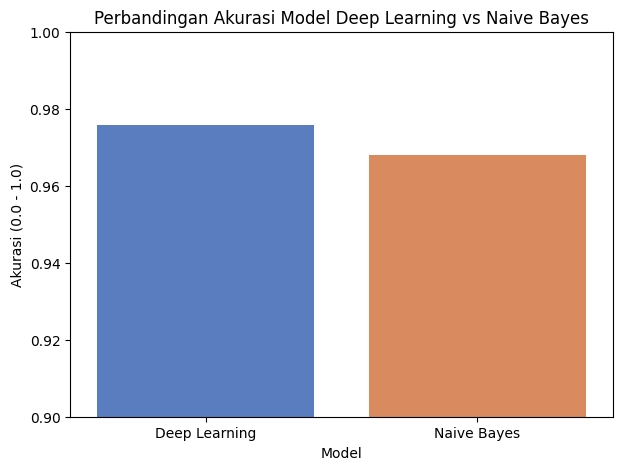

In [8]:
# Kumpulkan skor akurasi dari kedua model
acc_dl = accuracy_score(y_test, y_pred_dl)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Buat DataFrame untuk plotting
data_perbandingan = {
    'Model': ['Deep Learning', 'Naive Bayes'],
    'Akurasi': [acc_dl, acc_nb]
}
df_perbandingan = pd.DataFrame(data_perbandingan)

print("Data Perbandingan Akurasi:")
print(df_perbandingan)

# Buat Bar Chart
plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='Akurasi', data=df_perbandingan, palette='muted')
plt.title('Perbandingan Akurasi Model Deep Learning vs Naive Bayes')
plt.ylabel('Akurasi (0.0 - 1.0)')
plt.ylim(0.9, 1.0) # Fokuskan plot di area akurasi tinggi
plt.show()